In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pickle.load(open('synthetic_graphs.p'))

In [10]:
def rotate_vector(x, midpoint, degrees):
    x = x - midpoint
    theta = np.radians(degrees)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return (R @ x) + midpoint

def nodecolours(graph, main_colour, second_colour):
    node_colours = []
    for node in graph.nodes():
        if node < motif_n:
            node_colours.append(main_colour)
        else:
            node_colours.append(second_colour)
    return node_colours

def edgecolours(graph, main_colour, second_colour):
    edge_colours = []
    for edge in graph.edges():
        if edge[0] < motif_n and edge[1] < motif_n:
            edge_colours.append(main_colour)
        else:
            edge_colours.append(second_colour)
    return edge_colours

motif_n = 10
random_n = 10
blue = [0, 0.4470, 0.7410]
red = [0.8500, 0.3250, 0.0980]
grey = [0.5, 0.5, 0.5]

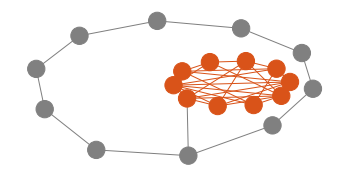

In [11]:
pos = nx.spring_layout(graph_0, seed=0)
pos = {key: rotate_vector(value, np.mean(list(pos.values()), axis=0), -90) for key, value in pos.items()}

# motif 
circle_pos = nx.circular_layout(nx.path_graph(motif_n))
anchor = (0.4, np.mean([pos[i] for i in range(motif_n, motif_n+random_n)], axis=0)[1])
circle_pos = {key: 0.2*value + anchor for key, value in circle_pos.items()}
circle_pos = {key: rotate_vector(value, np.mean(list(circle_pos.values()), axis=0), 220) for key, value in circle_pos.items()}
pos.update(circle_pos)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
nx.draw_networkx_nodes(graph_0, pos=pos, node_color=nodecolours(graph_0, red, grey), ax=ax)
nx.draw_networkx_edges(graph_0, pos=pos, edge_color=edgecolours(graph_0, red, grey), ax=ax)
ax.axis('off')
fig.savefig('../figures/graph_0.eps', format='eps', bbox_inches='tight')